# Find Orange Color in Frame

## Initial Imports

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Loading images and plotting it

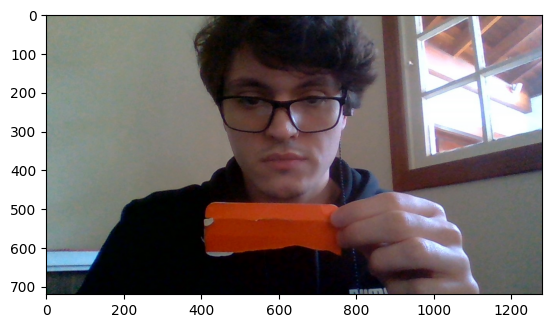

In [2]:
img = cv2.imread('media/orange_me.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

## Switching Frame Color from RGB to HSV, and Extracting Color from Pixel in X = 600 and Y = 550

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

hsv[600, 550]

array([  6, 248, 142], dtype=uint8)

## Aplying Mask

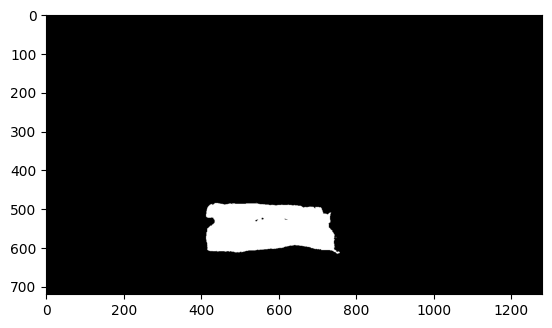

In [4]:
lower_orange = np.array([0, 200, 115])
upper_orange = np.array([10, 255, 200])

mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)

plt.imshow(mask_orange, cmap='gray')
plt.show()

### Treating mask, eroding and dilating to fill gaps inside the mask

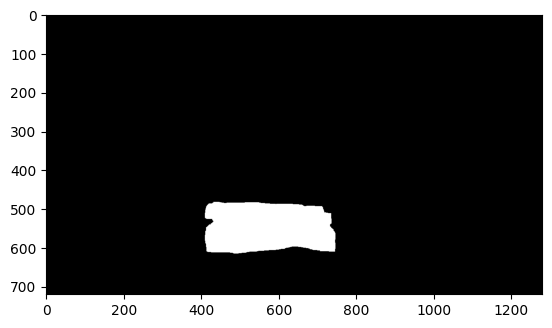

In [5]:
kernel = np.ones((7, 7), np.uint8)

mask_orange = cv2.erode(mask_orange, kernel, iterations = 1)
mask_orange = cv2.dilate(mask_orange, kernel, iterations = 2)

plt.imshow(mask_orange, cmap = 'gray')
plt.show()

## Finding Contours of the Mask

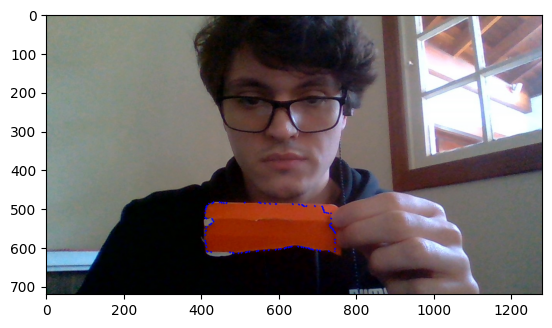

In [6]:
contours, _ = cv2.findContours(mask_orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

max_contour = max(contours, key = cv2.contourArea)

cv2.drawContours(img, max_contour, -1, (0, 0, 255), 3)

plt.imshow(img)
plt.show()

## Finding Moments and Drawing a Circle to Identify the Object

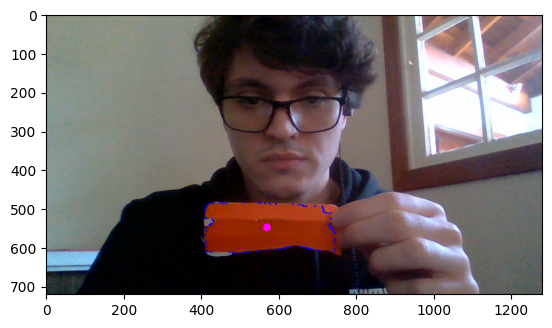

In [7]:
M = cv2.moments(max_contour)

if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    cv2.circle(img, (cx, cy), 10, (255, 0, 255), -1)

plt.imshow(img)
plt.show()

## Finding Max X and Y, and Min X and Y, in the Contours to Draw a Rectangle Around the Object

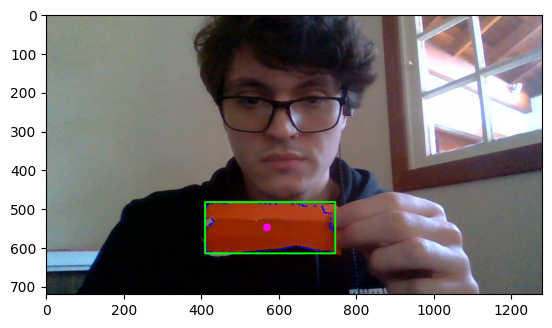

In [8]:
min_x = max_x = min_y = max_y = None

for c in max_contour:
    if min_x == None or c[0][0] < min_x:
        min_x = c[0][0]
    if max_x == None or c[0][0] > max_x:
        max_x = c[0][0]
    if min_y == None or c[0][1] < min_y:
        min_y = c[0][1]
    if max_y == None or c[0][1] > max_y:
        max_y = c[0][1]

cv2.rectangle(img, (min_x, min_y), (max_x, max_y), (0, 255, 0), 3)

plt.imshow(img)
plt.show()